In [7]:
import pandas as pd
import itertools
import matplotlib.pyplot as plt
import matplotlib

def to_c0_txt (input_file, output_file):
    df = pd.read_csv(input_file, delimiter=' ', header=None) #read file
    df_selected = df[[2, 6]] #choose sequence and c0 column
    df_selected.to_csv(output_file, sep=' ', header=False, index=False) #import to new txt file

def top_25_percent (input_file, output_file):
    df = pd.read_csv(input_file, delim_whitespace=True)# read new file with only sequence and c0
    c0_75th_percentile = df['C0'].quantile(0.75)#calculate 75th percentile
    filtered_df = df[df['C0'] > c0_75th_percentile] #store each entry where c0 > 75th pecentile
    filtered_df.to_csv(output_file, sep="\t", index=False) #new file
    
def low_25_percent (input_file, output_file):
    df = pd.read_csv(input_file, delim_whitespace=True)# read new file with only sequence and c0
    c0_25th_percentile = df['C0'].quantile(0.25)#calculate 25th percentile
    filtered_df = df[df['C0'] < c0_25th_percentile] #store each entry where c0 < 25th pecentile
    filtered_df.to_csv(output_file, sep="\t", index=False) #new file

def kmer_simi_under_5(input_file, kmer_len):
    if kmer_len > 5:
        print("kmer length too large")
        return None
    else:
        with open(input_file, "r") as file: #read file
            lines = file.readlines()
        kmer_dict = {}
        for kmer in map(''.join, itertools.product('ATCG', repeat=kmer_len)): #make all possilbe kmers
            count = 0
            for line in lines: #grab sequence
                columns = line.split()
                seq = columns[0]
                for i in range(len(seq) - kmer_len + 1): #count number of times sequence appears
                    sequence = seq[i:i + kmer_len]
                    if sequence == kmer:
                        count += 1
            kmer_dict[kmer] = count
    

        if kmer_len <= 5: #if too long then matplot will die
            sorted_kmer_dict = {k: v for k, v in sorted(kmer_dict.items(), key=lambda item: item[1], reverse=True)}
            k_mers = list(sorted_kmer_dict.keys())# Extract the k-mers and counts for plotting
            counts = list(sorted_kmer_dict.values())
            fig, ax = plt.subplots(figsize=(10, 6)) # Create a bar graph
            ax.bar(k_mers, counts)
            ax.set_xlabel("K-mer")# Add labels and title
            ax.set_ylabel("Number of Instances")
            ax.set_title("K-mer Similarity")
            plt.xticks(rotation=90)
            plt.xlabel("X-axis", labelpad=35)# Adjust x-axis label separation
            plt.show()# Display the graph
        top_ten_items = sorted(kmer_dict.items(), key=lambda x: x[1], reverse=True)[:10]
        for key, value in top_ten_items:
            print(f"Kmer: {key}, #of_instances: {value}")
        print("\t")


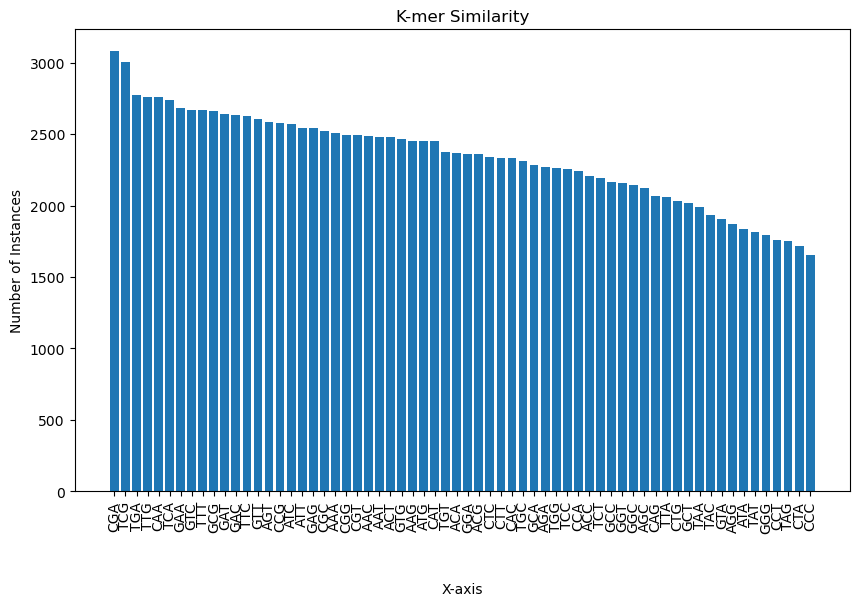

Kmer: CGA, #of_instances: 3078
Kmer: TCG, #of_instances: 3003
Kmer: TGA, #of_instances: 2775
Kmer: TTG, #of_instances: 2762
Kmer: CAA, #of_instances: 2757
Kmer: TCA, #of_instances: 2738
Kmer: GAA, #of_instances: 2680
Kmer: GTC, #of_instances: 2669
Kmer: TTT, #of_instances: 2666
Kmer: GCG, #of_instances: 2661
	


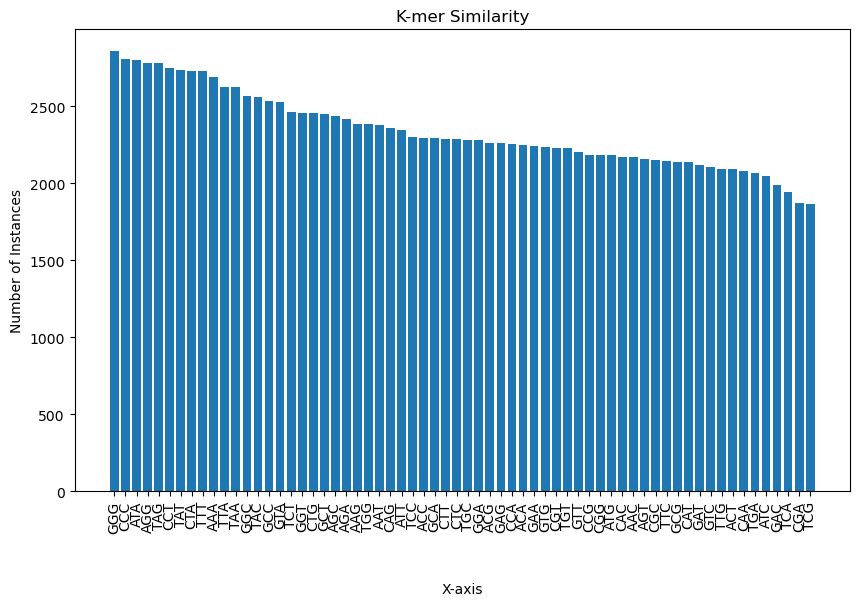

Kmer: GGG, #of_instances: 2855
Kmer: CCC, #of_instances: 2806
Kmer: ATA, #of_instances: 2800
Kmer: AGG, #of_instances: 2780
Kmer: TAG, #of_instances: 2777
Kmer: CCT, #of_instances: 2748
Kmer: TAT, #of_instances: 2735
Kmer: CTA, #of_instances: 2731
Kmer: TTT, #of_instances: 2726
Kmer: AAA, #of_instances: 2688
	


In [9]:

to_c0_txt(r"C:\Users\chris\Downloads\DNAcycP-main\zzzz\random.txt", r"C:\Users\chris\Downloads\DNAcycP-main\zzzz\C0.txt")

top_25_percent(r"C:\Users\chris\Downloads\DNAcycP-main\zzzz\C0.txt", r"C:\Users\chris\Downloads\DNAcycP-main\zzzz\top_25.txt")

low_25_percent(r"C:\Users\chris\Downloads\DNAcycP-main\zzzz\C0.txt", r"C:\Users\chris\Downloads\DNAcycP-main\zzzz\bottom_25.txt")

kmer_simi_under_5(r"C:\Users\chris\Downloads\DNAcycP-main\zzzz\bottom_25.txt", 3)

kmer_simi_under_5(r"C:\Users\chris\Downloads\DNAcycP-main\zzzz\top_25.txt", 3)

In [61]:
def mini_set(locate, kmer_len, start):
    kmer = ""
    count = {"A": 0, "T": 0, "C": 0, "G": 0}
    counter = 0
    j = 0
    for j in range(kmer_len - 1):
        count = {"A": 0, "T": 0, "C": 0, "G": 0}
        for line in locate:
            char = line[start + j]
            if char == "A":
                count["A"] += 1
            elif char == "T":
                count["T"] += 1
            elif char == "C":
                count["C"] += 1
            elif char == "G":
                count["G"] += 1
        if count["A"] >= 200 or count["T"] >= 200 or count["C"] >= 200 or count["G"] >= 200:
            largest = max(count, key=count.get)
            kmer += largest
            counter += count[largest]
        else:
            return None
    return [kmer, float(counter/(kmer_len - 1))]


def kmer_sim(input_file, Kmer):
    with open(input_file, "r") as file:
        lines = file.readlines()
    kmer_dict = {}
    lines.pop(0)
    i = 0
    for i in range(49 - Kmer + 1):
        A_locate = []
        T_locate = []
        C_locate = []
        G_locate = []
        counts = {"A": 0, "T": 0, "C": 0, "G": 0}
        for line in lines:
            column = line.split()
            seq = column[0][i]
            if seq == "A":
                counts["A"] += 1
                A_locate.append(line.strip())
            elif seq == "T":
                counts["T"] += 1
                T_locate.append(line.strip())
            elif seq == "C":
                counts["C"] += 1
                C_locate.append(line.strip())
            elif seq == "G":
                counts["G"] += 1
                G_locate.append(line.strip())
        if counts["A"] >= 200:
            a1 = mini_set(A_locate, Kmer, i)
            if a1 is not None:
                kmer_dict["A" + a1[0]] = a1[1]
        if counts["T"] >= 200:
            a2 = mini_set(T_locate, Kmer, i)
            if a2 is not None:
                kmer_dict["T" + a2[0]] = a2[1]
        if counts["C"] >= 200:
            a3 = mini_set(C_locate, Kmer, i)
            if a3 is not None:
                kmer_dict["C" + a3[0]] = a3[1]
        if counts["G"] >= 200:
            a4 = mini_set(G_locate, Kmer, i)
            if a4 is not None:
                kmer_dict["G" + a4[0]] = a4[1]
    return (kmer_dict)        

In [62]:
kmer_sim(r"C:\Users\chris\Downloads\DNAcycP-main\zzzz\top_25.txt", 3)

{'AAG': 493.0,
 'TTA': 507.5,
 'CCC': 475.5,
 'AAA': 496.0,
 'GGG': 477.5,
 'TTG': 499.5,
 'CCT': 492.0,
 'GGT': 488.0,
 'AAC': 477.5,
 'GGA': 501.5,
 'AAT': 490.5,
 'GGC': 496.5,
 'TTT': 536.5,
 'CCA': 461.0,
 'CCG': 492.5}

'A'